# Multivariate Normal Distribution - Mahalanobis Distance

> This document is written in *R*.
>
> ***GitHub***: https://github.com/czs108

## Question A

> Generate a sample of **1000** random points from a *Multivariate Normal Distribution* with *means* **0.0**, **0.0** and *standard deviations* of **1.5** along the $x$ axis and **0.5** along the $y$ axis.
>
> Plot the points on a graph with limits on the $x$ axis of $(-10,\, 10)$ and limits on the $y$ axis of $(-10,\, 10)$.

Use the `rnorm` function. 

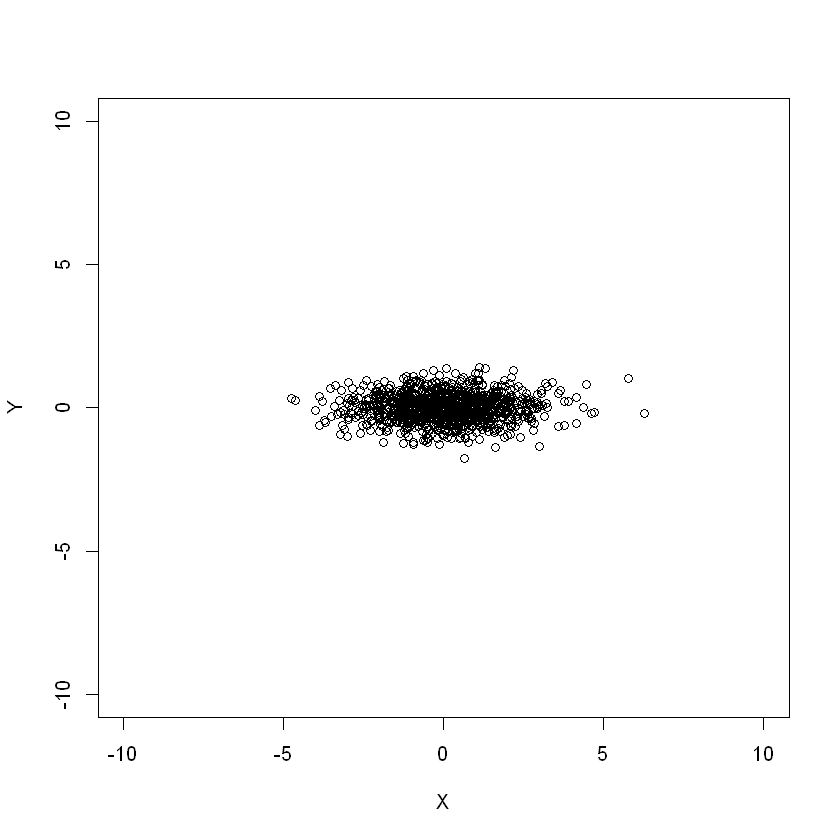

In [1]:
total <- 1000
X.1 <- rnorm(n=total, mean=0, sd=1.5)
Y.1 <- rnorm(n=total, mean=0, sd=0.5)

plot(Y.1 ~ X.1, xlim=c(-10, 10), ylim=c(-10, 10), xlab="X", ylab="Y")

## Question B

> Generate a sample of **1000** random points from a *Multivariate Normal Distribution* with *means* **-4.0**, **0.0** and *standard deviations* of **0.5** along the $x$ axis and **1.5** along the $y$ axis.
>
> Plot the points on the current graph with color *blue*.

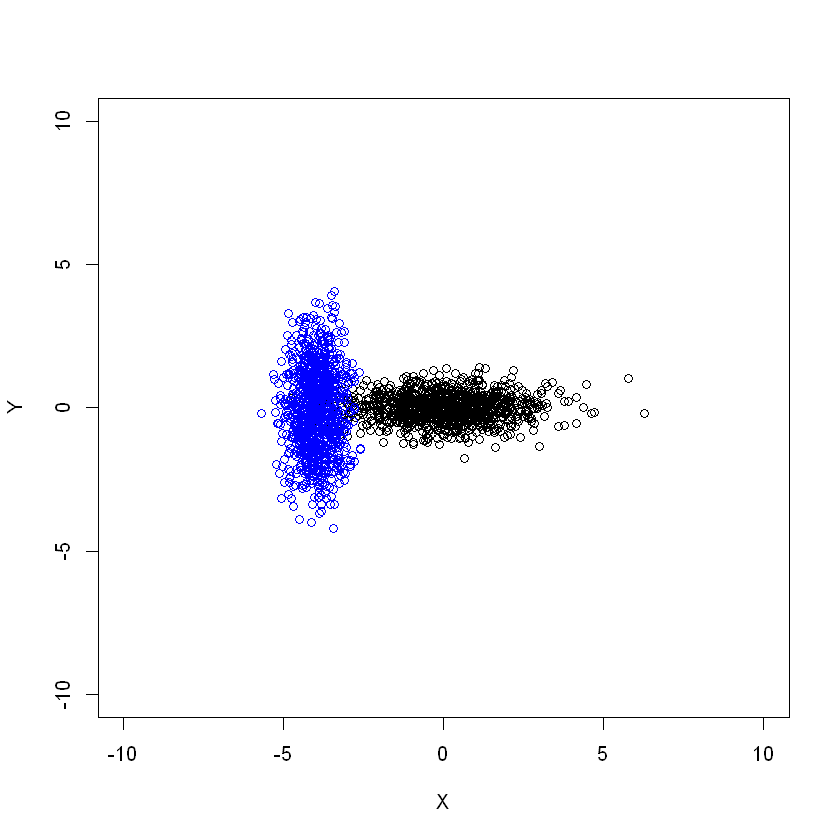

In [2]:
X.2 <- rnorm(n=total, mean=-4.0, sd=0.5)
Y.2 <- rnorm(n=total, mean=0, sd=1.5)

plot(Y.1 ~ X.1, xlim=c(-10, 10), ylim=c(-10, 10), xlab="X", ylab="Y")
points(Y.2 ~ X.2, col="blue")

## Question C

> Compute the *Mahalanobis Distance* of each of the **2000** points from each of the distributions.

\begin{equation}
d^{2} = \frac{(x - m_x)^2}{\sigma^2_x} + \frac{(y - m_y)^2}{\sigma^2_y}
\end{equation}

In [3]:
mahadist <- function(point, mean, sd) {
    d.x <- ((point[1] - mean[1]) ^ 2) / (sd[1] ^ 2)
    d.y <- ((point[2] - mean[2]) ^ 2) / (sd[2] ^ 2)
    return (d.x + d.y)
}

In [4]:
dist.1 <- NULL
for (i in c(1:total)) {
    dist.1[i] <- mahadist(c(X.1[i], Y.1[i]), c(0, 0), c(1.5, 0.5))
}

dist.2 <- NULL
for (i in c(1:total)) {
    dist.2[i] <- mahadist(c(X.2[i], Y.2[i]), c(-4.0, 0), c(0.5, 1.5))
}

dist.1[c(1:5)]
dist.2[c(1:5)]

[1] 0.08352166 0.52580737 2.89716097 2.76312320 0.57073845

[1] 0.84984338 0.78232901 0.04022489 3.79224983 1.78857294

## Question D

> Classify each point using the *Mahalanobis Distance*. How accurate is your classifier?

In [5]:
correct.1 <- NULL
for (i in c(1:total)) {
    if (dist.1[i] <= mahadist(c(X.1[i], Y.1[i]), c(-4.0, 0), c(0.5, 1.5))) {
        correct.1[i] = TRUE
    } else {
        correct.1[i] = FALSE
    }
}

correct.2 <- NULL
for (i in c(1:total)) {
    if (dist.2[i] <= mahadist(c(X.2[i], Y.2[i]), c(0, 0), c(1.5, 0.5))) {
        correct.2[i] = TRUE
    } else {
        correct.2[i] = FALSE
    }
}

For the *black* distribution, the accuracy is:

In [6]:
sum(correct.1) / total

[1] 0.972

For the *blue* distribution, the accuracy is:

In [7]:
sum(correct.2) / total

[1] 0.994

## Question E

> In order to visualise the feature space, plot a grid of points on the current graph covering the whole space. Compute the *Mahalanobis Distances* at each point.
>
> Plot a *black* circle if the point is closer to the *black* distribution and *blue* point if it is closer to the *blue* distribution.

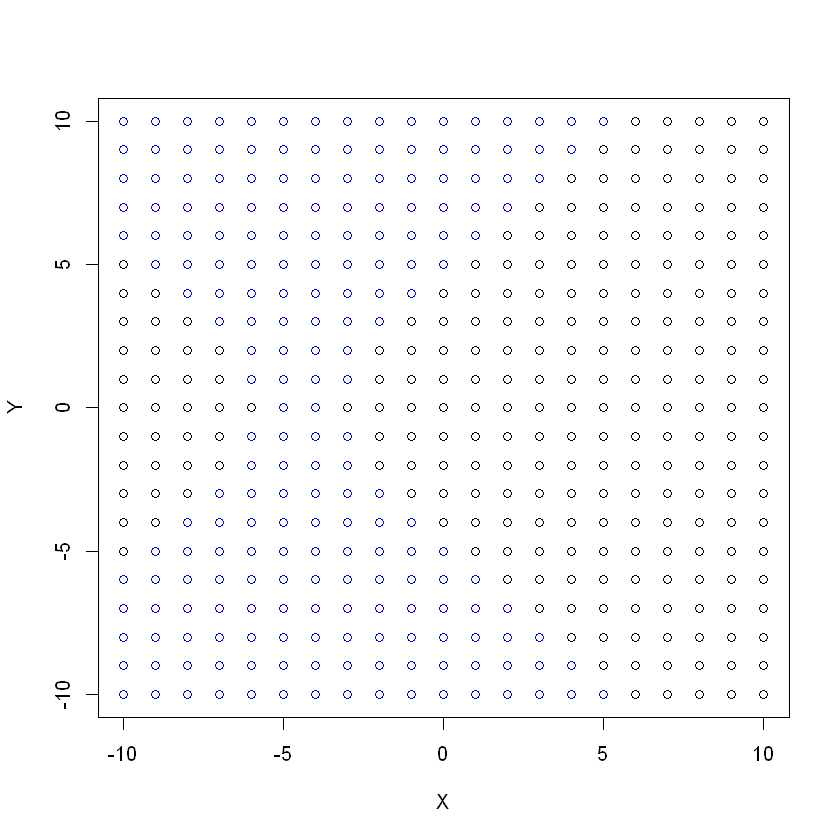

In [8]:
loc.1.x <- NULL
loc.1.y <- NULL
loc.2.x <- NULL
loc.2.y <- NULL

for (x in c(-10:10)) {
    for (y in c(-10:10)) {
        dist.1 <- mahadist(c(x, y), c(0, 0), c(1.5, 0.5))
        dist.2 <- mahadist(c(x, y), c(-4.0, 0), c(0.5, 1.5))
        if (dist.1 <= dist.2) {
            loc.1.x[length(loc.1.x) + 1] <- x
            loc.1.y[length(loc.1.y) + 1] <- y
        } else {
            loc.2.x[length(loc.2.x) + 1] <- x
            loc.2.y[length(loc.2.y) + 1] <- y
        }
    }
}

plot(loc.1.y ~ loc.1.x, xlim=c(-10, 10), ylim=c(-10, 10), xlab="X", ylab="Y")
points(loc.2.y ~ loc.2.x, col="blue")